## Model Construction for S&P 500 Closing Prices

The data will now be used in the GradientRegressor model to evaluate the predicted prices of this model. Here's all the steps for model construction:

1. Import the following needed libraries
2. Load the preprocessed_data.npz file
3. Train and evaluate each model and use RMSE to see which model has the lowest error indicating as the best model. 
4. Make predictions on the entire dataset on the best model.
5. Plot the actual vs predicted lines over time to visualize how well the model did. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = np.load('preprocessed_data.npz')

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
X = data['X']
y = data['y']


models = {
    'Model 1': GradientBoostingRegressor(n_estimators=50, learning_rate=0.1),
    'Model 2': GradientBoostingRegressor(n_estimators=100, learning_rate=0.01),
    'Model 3': GradientBoostingRegressor(n_estimators=500, learning_rate=0.001, max_depth=5)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {'RMSE': rmse}
    print(f"{model_name}: RMSE={rmse:.2f}")

Model 1: RMSE=$36.48
Model 2: RMSE=$273.42
Model 3: RMSE=$435.16


Best Model: Model 1
Mean Actual Price: $471.30
Mean Predicted Price: $471.72


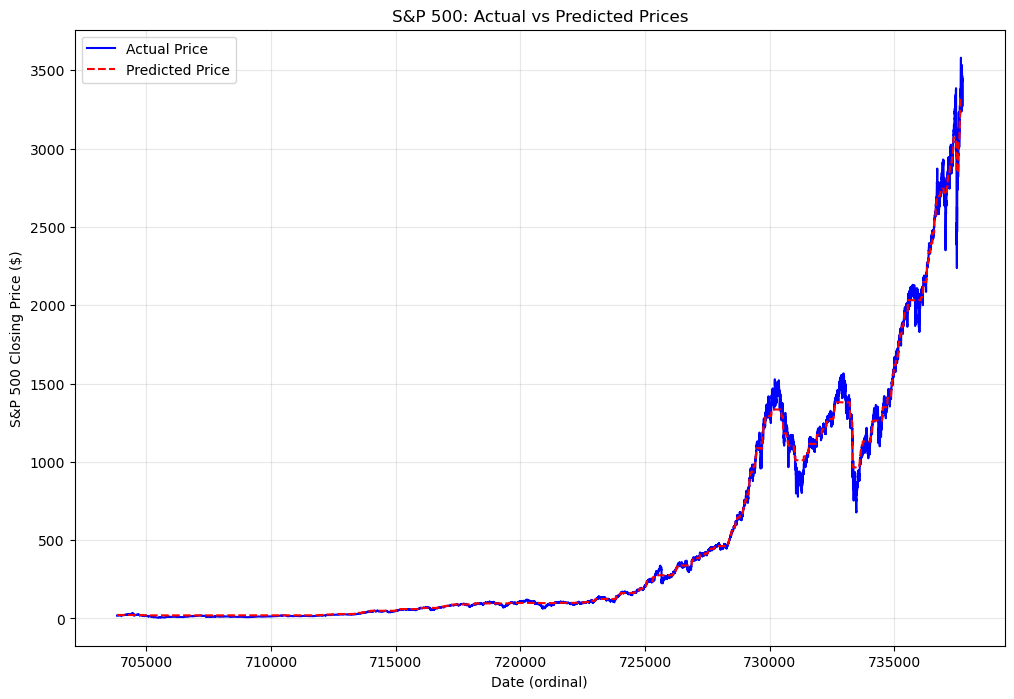

In [30]:
# Selecting the best model based on the lowest RMSE (Root Mean Squared Error)

best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")


test_losses = []
for y_pred in best_model.staged_predict(X_test):
    test_losses.append(mean_squared_error(y_test, y_pred))

# Predicts on the entire dataset 
y_pred_full = best_model.predict(X) 
y_pred_test = best_model.predict(X_test)


mse_test = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse_test)
actual = y_test.mean()
predicted = y_pred_test.mean()

print(f"Mean Actual Price: ${actual:.2f}")
print(f"Mean Predicted Price: ${predicted:.2f}")


plt.figure(figsize=(12, 8))

# Line for the actual price represented with blue color
plt.plot(X, y, label='Actual Price', color='blue')

# Line for the predicted price represented with red color
plt.plot(X, y_pred_full, label='Predicted Price', color='red', linestyle='--')

plt.xlabel('Date (ordinal)')
plt.ylabel('S&P 500 Closing Price ($)')
plt.title('S&P 500: Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




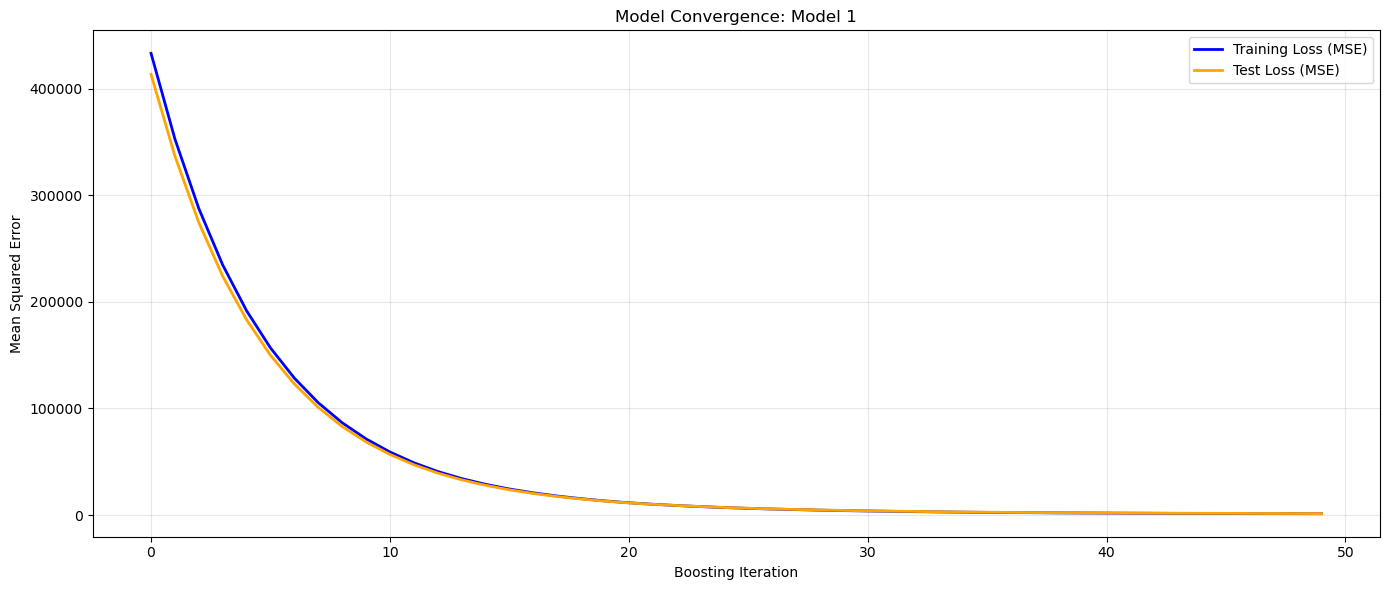

In [15]:
train_losses = best_model.train_score_
test_losses = []
for y_pred in best_model.staged_predict(X_test):
    test_losses.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(14, 6))
plt.plot(train_losses, label='Training Loss (MSE)', linewidth=2, color='blue')
plt.plot(test_losses, label='Test Loss (MSE)', linewidth=2, color='orange')
plt.xlabel('Boosting Iteration')
plt.ylabel('Mean Squared Error')
plt.title(f'Model Convergence: {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()